# AOS AuxTel test data 

Use data from https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L222
https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L412 , used in unit tests: 
    
    2021032300308
    2021032300310
    


In [1]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/')

registry = butler.registry
datasetRefs = list(registry.queryDatasets(instrument='LATISS', datasetType='raw', collections=['LATISS/raw/all'],
                                          where="exposure.day_obs=20210323"
                                         ))
datasetRefs[0]

DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {instrument: 'LATISS', detector: 0, exposure: 2021032300001, ...}, id=c17708d6-c627-5431-a836-28cd2cfff8ef, run='LATISS/raw/all')

Check FOCUSZ in this series of exposures:

In [2]:

for exp in range(307,313):
    exposure = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':int(f'2021032300{exp}')
                                        },
                      collections=['LATISS/raw/all'])
    print(exp, exposure.getMetadata()['FOCUSZ'])

/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


307 -0.847813427448273


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


308 0.752186596393585


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000309-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


309 -0.839468240737915


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000310-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


310 0.760531783103943


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000311-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


311 -0.0349768586456776


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000312-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


312 -0.0349768586456776


In [3]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')



exposure_intra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300307},
                      collections=['LATISS/raw/all'])
print(exposure_intra.getMetadata()['FOCUSZ'])


exposure_extra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300308},
                      collections=['LATISS/raw/all'])

print(exposure_extra.getMetadata()['FOCUSZ'])



/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


-0.847813427448273
0.752186596393585


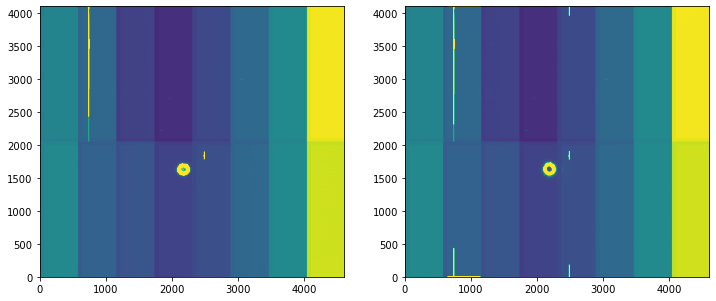

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax  = plt.subplots(1,2,figsize=(12, 10))
ax[0].imshow(exposure_extra.image.array, origin='lower',vmax=20000)# vmax=50)
mappable = ax[1].imshow(exposure_intra.image.array, origin='lower',vmax=20000)
#plt.colorbar(mappable,ax=ax[1])

Run the ISR: 

    ssh lsst-devl02

    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib

    pipetask run  --data-query "exposure IN (2021032300307,2021032300308,2021032300309,2021032300310,2021032300311) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISRtest --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
    
  

Show the postISR : 

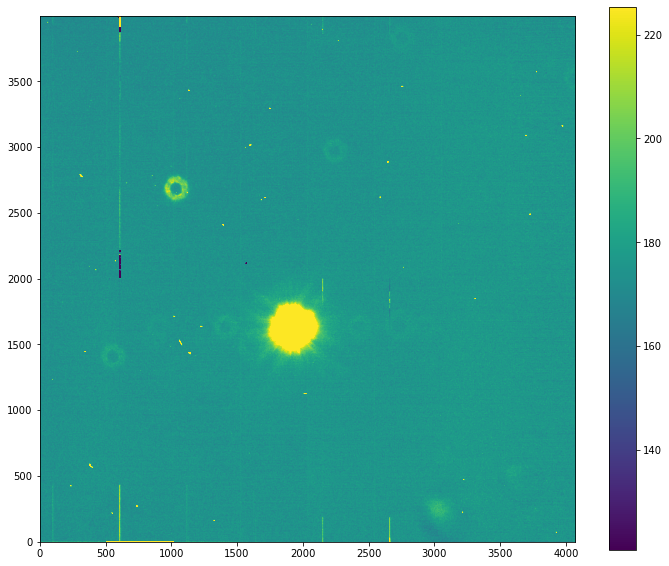

In [5]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
hdula = fits.open('/repo/main/u/scichris/Latiss/postISRtest/20210930T214817Z/\
postISRCCD/20210323/AT_O_20210323_000307/\
postISRCCD_LATISS_RG610~empty_AT_O_20210323_000307_RXX_S00_u_scichris_Latiss_postISRtest_20210930T214817Z.fits')
fig = plt.figure(figsize=(12, 10))
zscale = ZScaleInterval()
data = hdula[1].data
vmin, vmax = zscale.get_limits(data)
plt.imshow(data, origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()

## Run Zernike estimation

In [6]:
from lsst.daf import butler as dafButler
instrument = 'LATISS'
dataId0 = dict(instrument=instrument)
repo_dir = '/repo/main/'
butler = dafButler.Butler(repo_dir, collections=['run1'])
                          
dataset = next(iter(
                butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  )
                )
           )

expN = dataset.dataId["exposure"]

# Get the refs  for this dataset
refs = []
for ref in butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  ):
    refs.append(ref)

In [7]:
refs[0].dataId

{instrument: 'LATISS', detector: 0, exposure: 2021032300307, ...}

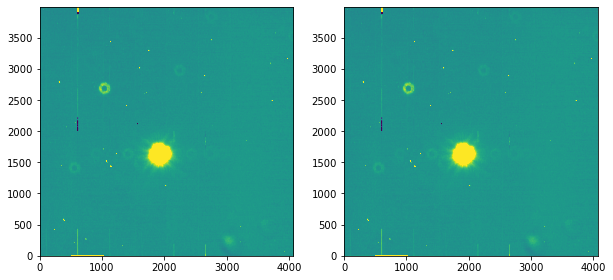

In [8]:
exp1 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[0].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

exp2 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[1].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10,5))
data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[0].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[1].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

In [9]:
expPair = [exp1,exp2]

## Fit the donut template 

In [10]:
from lsst.ts.wep.task.EstimateZernikesLatissTask import EstimateZernikesLatissTask, EstimateZernikesLatissTaskConfig
estimateZernikeConfig = EstimateZernikesLatissTaskConfig(donutStampSize=200,donutTemplateSize=200)
estimateZernikeTask = EstimateZernikesLatissTask(config=estimateZernikeConfig)
estimateZernikeTask.instName = 'auxTel'
estimateZernikeTask.opticalModel = 'onAxis'

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from lsst.ts.wep.Utility import DefocalType

# get the defocal exposure...
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', collections=['u/scichris/Latiss/postISRtest'])
exposure  = butler.get(datasetRefOrType='postISRCCD',
                       dataId={'detector':"RXX_S00",'exposure':2021032300307})


# make template 
detectorName = exposure.getDetector().getName()
pixelScale = exposure.getWcs().getPixelScale().asArcseconds()
defocalType = DefocalType.Extra
template = estimateZernikeTask.getTemplate(detectorName, defocalType, pixelScale)

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885


Text(0.5, 1.0, 'auxTel, onAxis, mSf=0.5')

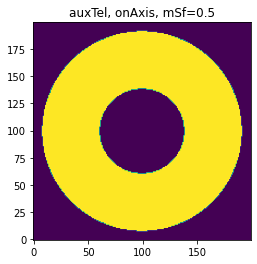

In [12]:
plt.imshow(template,origin='lower')
plt.title(f'auxTel, {estimateZernikeTask.opticalModel}, mSf=0.5')
#plt.savefig(f'auxTel_{estimateZernikeTask.opticalModel}_maskScalingFactorLocal-05.png')

Detect the donuts:

(array([2.9000000e+01, 1.0200000e+02, 3.2990000e+03, 2.7488110e+06,
        1.2463475e+07, 9.7574100e+05, 1.7710000e+04, 6.8070000e+03,
        4.5060000e+03, 3.3460000e+03]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.],
       dtype=float32),
 <BarContainer object of 10 artists>)

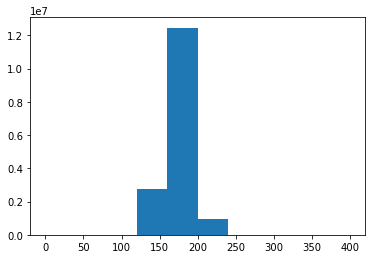

In [40]:
plt.hist(np.ravel(exp), range=(0,400))

In [29]:
exp = exposure.getImage().getArray()


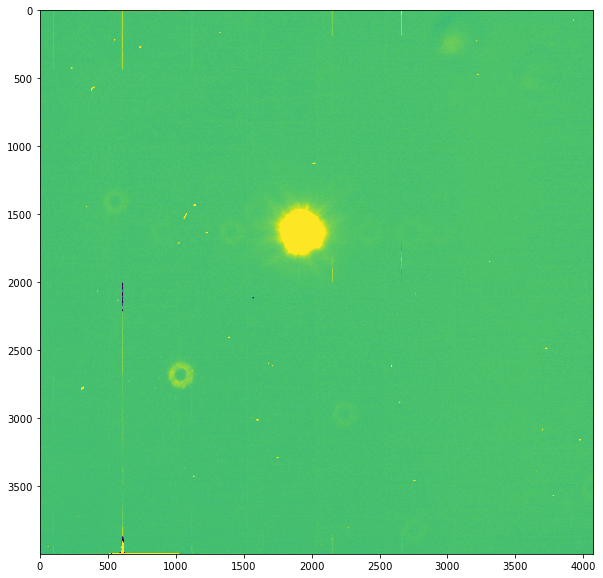

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(exp, vmin=-10, vmax=250)

In [46]:
from lsst.ts.wep.DonutDetector import DonutDetector
detector = DonutDetector()

from copy import copy
expArray = copy(exposure.getImage().getArray())

# this is to make sure that oversaturated pixels do not 
# confuse the image range 
expArray[expArray < 0] = 0
expArray[expArray > 200] = 100

donutDf = detector.detectDonuts(expArray,template,blendRadius=100,
                               peakThreshold=0.9)

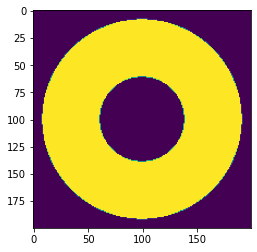

In [49]:
plt.imshow(template)

Make a donut catalog, which needs a coordinate column, and different names for columns

In [14]:
# need  to rename columns 
# as we EstimateZernikes 
# expects different names 
#Unnamed: 0	coord_ra	coord_dec	centroid_x	centroid_y	source_flux	detector	mags
donutCat = donutDf.copy()

# also, need to transpose y--> x 
donutCat = donutCat.rename(columns={"y_center":"centroid_x", "x_center":"centroid_y"})

donutCat['detector'] = "RXX_S00"



Plot the detected donuts on top of the exposure

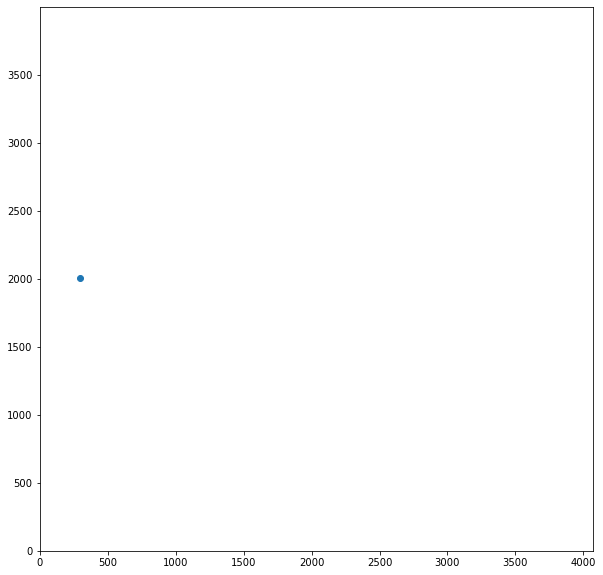

In [15]:
from astropy.visualization import ZScaleInterval
data = expArray
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(data)

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(data, vmin=vmin, vmax=vmax,cmap='Greys', origin='lower')
ax.scatter(donutDf['y_center'], donutDf['x_center'])

#ax.imshow(template,alpha=0.1)

Try to get any ra,dec in radians, even based on an incorrect WCS, to pass to `cutoutStamps`:

In [16]:
wcs = exposure.getWcs()

import numpy as np 
x = np.array(donutCat['centroid_x'].values)
y = np.array(donutCat['centroid_y'].values)

x = np.zeros(0)
for row in donutCat['centroid_x'] : 
    x = np.append(x, row)
    
ra,dec = wcs.pixelToSkyArray(x,y,degrees=False)  

donutCat['coord_ra'] = ra
donutCat['coord_dec'] = dec

Run the Zernike estimation given the exposure pair and the donut catalog

In [17]:
# This should return the extra-focal DonutStamps, intra-focal DonutStamps and
# Zernike coefficient numpy array as Struct that can be saved to
# Gen 3 repository all with the same dataId.
zernikeOutput = estimateZernikeTask.run(expPair, donutCat, "LATISS")

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
0 / 1
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
imageCoCenter: (x, y) = (   79.11,   86.45)

imageCoCenter: (x, y) = (  150.33,  161.33)

itr = 0, z4-z22
[ 1.  3.  3.  0.  2.  0. -0. -0. -1. -1.  1. -1. -0. -0.  0. -0. -0. -0.
 -0.]
itr = 1, z4-z22
[ 2.  3.  3.  0.  2.  0. -0. -0. -1. -1.  1. -1. -0. -0.  0. -0. -0. -0.
 -0.]
itr = 2, z4-z22
[ 3.  4.  4.  0.  1.  0. -0. -0. -1. -1.  1. -1. -0. -0.  0. -0. -0. -0.
 -0.]
itr = 3, z4-z22
[ 4. 

Explore the results

IndexError: index 1 is out of bounds for axis 0 with size 1

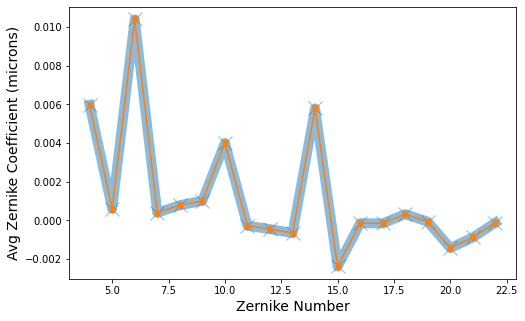

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 5))
# I'm not sure about the OPD values to compare to... 
#plt.plot(np.arange(4, 23), opdVals[85], '-o', lw=3, markersize=10, label='OPD')
plt.plot(np.arange(4, 23),  zernikeOutput.outputZernikesAvg, '-x', lw=10,alpha=0.5, markersize=14, label='average')
for i in [0,1,2,3,4,5,6,7]:
    plt.plot(np.arange(4, 23),zernikeOutput.outputZernikesRaw[i], '-d', label=f'donut {i}')
    plt.xlabel('Zernike Number', size=14)
    plt.ylabel('Avg Zernike Coefficient (microns)', size=14)
plt.legend(fontsize=14, loc='center right')

Plot the donut stamps 

In [ ]:
fig,ax = plt.subplots(8,2,figsize=(8,4*8))

for i in range(len(zernikeOutput.donutStampsExtra)):
    donut = zernikeOutput.donutStampsExtra[i]
    ax[i,0].imshow(donut.stamp_im.getArrays()[0], origin='lower')
    
    donut = zernikeOutput.donutStampsIntra[i]
    ax[i,1].imshow(donut.stamp_im.getArrays()[0], origin='lower')
ax[0,0].set_title('Extra')
ax[0,1].set_title('Intra')